GaussianNB(高斯),資料為常態分佈<br>
MultinomialNB(多類別),用在離散值(1,4,6,7,9)<br>
ComplementNB,增補MultinomialNB在不平衡資料集的問題<br>
BernoulliNB(伯努利),資料為2元值(0,1)<br>
CategoricalNB,資料為離散型<br>

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB  #註解

In [2]:
#X有5筆資料,每筆資料有8個特徵
#y已知,代表可以使用監督式學習的分類
X = np.array([[1,2,3,4,5,6,7,1],
              [3,1,3,1,3,6,6,2],
              [5,1,2,9,3,8,8,3],
              [2,4,2,5,2,4,2,4],
              [3,3,2,5,1,7,7,5]])
y = np.array([1,2,3,2,1])        

In [3]:
clfG = GaussianNB()                 #clf為classifier的縮寫
clfG.fit(X,y)                       #fit將演算法訓練為模型
print("準確度",clfG.score(X,y))      #分類的預設測量值為Accurancy

準確度 1.0


In [4]:
#scikit-learn的輸入資料(x)必須為2維陣列(使用ndarray.reshape)
np.array([2,2,4,5,6,8,8,8]).reshape(1,-1)

array([[2, 2, 4, 5, 6, 8, 8, 8]])

In [5]:
 np.array([2,2,4,5,6,8,8,8]).reshape(1,-1).shape

(1, 8)

In [6]:
#t1,t2為新資料,希望能夠預測對應的y
t1 = np.array([2,2,4,5,6,8,8,8]).reshape(1,-1)  
t2 = np.array([2,3,4,5,6,8,8,8]).reshape(1,-1)

In [7]:
clfG.predict(t1)
#輸出為類別

array([2])

In [8]:
clfG.predict_proba(t1)
# 各個類別的機率
# 1   2   3

array([[0., 1., 0.]])

In [9]:
clfG.predict(t2)

array([2])

In [10]:
clfG.predict_proba(t2)

array([[0., 1., 0.]])

## 高斯NB的預測下,t1->2,t2->2

In [11]:
from sklearn.naive_bayes import BernoulliNB
clfB = BernoulliNB()
clfB.fit(X,y)
print("準確度",clfB.score(X,y))
clfB.predict(t1)

準確度 0.4


array([1])

In [12]:
clfB.predict_proba(t1)

array([[0.4556074, 0.4556074, 0.0887852]])

In [13]:
clfB.predict(t2)

array([1])

In [14]:
clfB.predict_proba(t2)

array([[0.4556074, 0.4556074, 0.0887852]])

## 伯努利NB的預測下,t1->1,t2->1<br>
## 高斯NB的預測下,t1->2,t2->2

In [15]:
from sklearn.naive_bayes import MultinomialNB
clfM = MultinomialNB(alpha=1.0,class_prior=None,fit_prior=True)
clfM.fit(X,y)
print("準確度",clfM.score(X,y))
clfM.predict(t1)

準確度 0.8


array([1])

In [16]:
clfM.predict_proba(t1)

array([[0.55943635, 0.42565901, 0.01490464]])

In [17]:
clfM.predict(t2)

array([1])

In [18]:
clfM.predict_proba(t2)

array([[0.51772711, 0.4754251 , 0.0068478 ]])

## 多類別NB的預測下,t1->1,t2->1<br>
## 伯努利NB的預測下,t1->1,t2->1<br>
## 高斯NB的預測下,    t1->2,t2->2

In [19]:
#scikit-learn 0.20新增,用來解決不平衡資料集在MultinomialNB所遭遇的問題
from sklearn.naive_bayes import ComplementNB
clfC = ComplementNB(alpha=1.0,class_prior=None,fit_prior=True)
clfC.fit(X,y)
print("準確度",clfC.score(X,y))
clfC.predict(t1)

準確度 0.8


array([2])

In [20]:
clfC.predict_proba(t1)

array([[0.39709286, 0.44929884, 0.1536083 ]])

In [21]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [22]:
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [23]:
#一筆資料有下列特徵
print(feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [24]:
#標籤分為malignant惡性,benign良性
print(label_names)  

['malignant' 'benign']


In [25]:
features[0] #第一筆資料的特徵

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [26]:
labels[0]  #第一筆資料的判定(經過醫生判定),0是惡性,1是良性

0

In [27]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels = train_test_split(features,labels,test_size=0.2) #80%訓練資料，20%測試資料

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
mode = gnb.fit(train_features,train_labels)

In [29]:
#訓練誤差,預設使用Accurancy(準確度)
print("訓練誤差",gnb.score(train_features,train_labels))
print("一般誤差",gnb.score(test_features,test_labels))

訓練誤差 0.9516483516483516
一般誤差 0.9035087719298246


In [30]:
preds = gnb.predict(test_features)
print("預測結果",preds)
print("真實結果",test_labels)

預測結果 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1
 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 1 1 1]
真實結果 [0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1
 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1
 1 1 1]


In [31]:
#產生混淆矩陣,請注意所得結果的相關位置
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,preds)

#        M_neg  M_pos   --模型預測結果 陰 陽
#  G_neg   TN    FP
#  G_pos   FN    TP
#真實
#   陰
#   陽

array([[36, 11],
       [ 0, 67]], dtype=int64)

In [32]:
tn, fp, fn, tp = confusion_matrix(test_labels,preds).ravel() #將多維陣列變成一維陣列
print(tn, fp, fn, tp)

36 11 0 67


In [33]:
test_labels.size

114

In [34]:
from sklearn.metrics import accuracy_score
print('準確度:{}'.format(accuracy_score(test_labels,preds)))  # (tn+tp)/total

準確度:0.9035087719298246


In [35]:
from sklearn.metrics import average_precision_score
print('精準度:{}'.format(average_precision_score(test_labels,preds))) # tp/(tp+fp)

精準度:0.8589743589743589


In [36]:
from sklearn.metrics import recall_score
print('喚回:{}'.format(recall_score(test_labels,preds))) # tp/(tp+fn)

喚回:1.0


In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(test_labels,preds)
print(tpr,fpr)
print('AUC:{}'.format(auc(fpr, tpr)))

[0. 1. 1.] [0.         0.23404255 1.        ]
AUC:0.8829787234042553


In [38]:
gnb.score(test_features,test_labels)

0.9035087719298246

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv(r'c:\pyml_scripts\chapter03_naivebayes\winequality-red.csv', header=0, sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [41]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


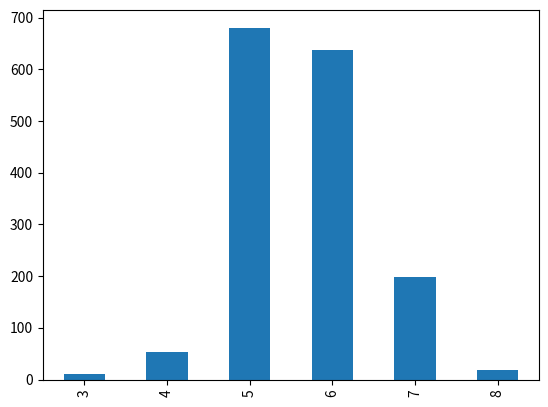

In [42]:
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [43]:
from sklearn.dummy import DummyClassifier
dummyclf = DummyClassifier(strategy='most_frequent')  #永遠猜最多數量的分類標籤
dummyclf.fit(X_train,y_train)
dummyclf.score(X_test,y_test)

0.375

In [44]:
dummyclf = DummyClassifier(strategy='stratified')
dummyclf.fit(X_train,y_train)
dummyclf.score(X_test,y_test)

0.371875

所以分類器的分數至少要大於0.43才能夠接受

In [45]:
modelg = GaussianNB()
modelg.fit(X_train, y_train)
modelg.score(X_test,y_test)

0.55

In [46]:
modelm = MultinomialNB()       #scikit-learn 0.20以上,因為資料有明顯不平衡,可以考慮使用ComplementNB
modelm.fit(X_train, y_train)
modelm.score(X_test,y_test)   

0.446875

In [47]:
from sklearn.naive_bayes import ComplementNB
modelC = ComplementNB(alpha=1.0,class_prior=None,fit_prior=True)
modelC.fit(X_train, y_train)
print("準確度",modelC.score(X_train, y_train))

準確度 0.48866301798279904


In [48]:
modelb = BernoulliNB()
modelb.fit(X_train, y_train)
modelb.score(X_test,y_test)

0.375

對資料進行標準化,正規化

In [49]:
import numpy as np
wine2_except_quality = df.drop("quality", axis=1)
X = wine2_except_quality.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x))).values  #nomalization
y = df['quality']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [51]:
modelg = GaussianNB()
modelg.fit(X_train, y_train)
modelg.score(X_test,y_test)

0.53125

In [52]:
modelb = BernoulliNB()
modelb.fit(X_train, y_train)
modelb.score(X_test,y_test)

0.5375

In [53]:
wine2_except_quality = df.drop("quality", axis=1)
X = wine2_except_quality.apply(lambda x: (x - np.mean(x)) / np.std(x)).values  #standarization
y = df['quality']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [55]:
modelg = GaussianNB()
modelg.fit(X_train, y_train)
modelg.score(X_test,y_test)

0.490625

In [56]:
modelb = BernoulliNB()
modelb.fit(X_train, y_train)
modelb.score(X_test,y_test)

0.521875

In [57]:
wine2_except_quality = df.drop("quality", axis=1)
X = wine2_except_quality.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))).values  #MinMaxScaler
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [58]:
modelg = GaussianNB()
modelg.fit(X_train, y_train)
modelg.score(X_test,y_test)

0.515625

In [59]:
modelm = MultinomialNB()
modelm.fit(X_train, y_train)
modelm.score(X_test,y_test)

0.503125

In [60]:
#scikit-learn 0.20以上,因為資料有明顯不平衡,可以考慮使用ComplementNB
modelC = ComplementNB(alpha=1.0,class_prior=None,fit_prior=True)
modelC.fit(X_train, y_train)
modelC.score(X_test,y_test)

0.484375

In [61]:
modelb = BernoulliNB()      
modelb.fit(X_train, y_train)
modelb.score(X_test,y_test)

0.390625